In [1]:
import torch
import torch.nn as nn
from PIL import Image
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import math


In [2]:
PATH= Path('data/mnist/')
PATH

WindowsPath('data/mnist')

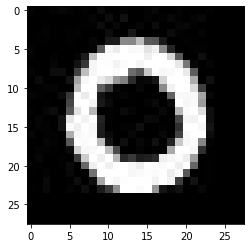

In [3]:
image = Image.open("img_1.jpg")
plt.imshow(image, cmap="gray");

In [4]:
np.array(image).shape

(28, 28)

In [5]:
df = pd.DataFrame(np.array(image))
df.style.set_properties().background_gradient("Greys")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,3,0,0,3,7,3,0,3,0,11,0,0,3,0,0,3,8,0,0,3,0,0,0,2,0,0,0,0
1,0,0,0,0,0,0,0,1,5,0,12,0,16,0,0,4,0,2,8,3,0,4,8,0,0,0,0,0
2,0,0,2,0,0,0,1,2,1,12,0,8,0,0,6,0,11,0,0,6,7,2,0,0,0,0,0,0
3,0,1,3,0,0,2,3,0,0,0,12,0,0,23,0,0,0,0,11,3,0,0,4,0,0,0,0,0
4,0,1,1,0,0,2,0,0,6,0,25,27,136,135,188,89,84,25,0,0,3,1,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,3,88,247,236,255,249,250,227,240,136,37,1,0,2,2,0,0,0,0,0
6,2,0,0,3,0,0,4,27,193,251,253,255,255,255,255,240,254,255,213,89,0,0,14,1,0,0,0,0
7,0,0,0,6,0,0,18,56,246,255,253,243,251,255,245,255,255,254,255,231,119,7,0,5,0,0,0,0
8,4,0,0,12,13,0,65,190,246,255,255,251,255,109,88,199,255,247,250,255,234,92,0,0,0,0,0,0
9,0,10,1,0,0,18,163,248,255,235,216,150,128,45,6,8,22,212,255,255,252,172,0,15,0,0,0,0


In [6]:
list(PATH.iterdir())

[WindowsPath('data/mnist/train'), WindowsPath('data/mnist/validation')]

In [10]:
Path.ls = lambda x: list(x.iterdir())

In [11]:
Image.open((PATH/"train/1").ls()[0])

In [12]:
(PATH/"train").ls()

[WindowsPath('data/mnist/train/0'),
 WindowsPath('data/mnist/train/1'),
 WindowsPath('data/mnist/train/2'),
 WindowsPath('data/mnist/train/3'),
 WindowsPath('data/mnist/train/4'),
 WindowsPath('data/mnist/train/5'),
 WindowsPath('data/mnist/train/6'),
 WindowsPath('data/mnist/train/7'),
 WindowsPath('data/mnist/train/8'),
 WindowsPath('data/mnist/train/9')]

In [13]:
four =[torch.tensor(np.array(Image.open(img)), dtype = torch.float32) for img in (PATH/"train/4").ls()]
five =[torch.tensor(np.array(Image.open(img)), dtype = torch.float32) for img in (PATH/"train/5").ls()]

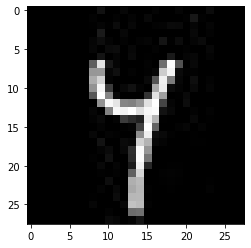

In [14]:
plt.imshow(four[0], cmap="gray");

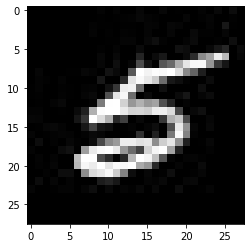

In [15]:
plt.imshow(five[0], cmap="gray");

In [16]:
four_stacked = torch.stack(four, dim=0)/255
four_stacked.shape

torch.Size([2984, 28, 28])

In [17]:
five_stacked = torch.stack(five, dim=0)/255
five_stacked.shape

torch.Size([2771, 28, 28])

In [18]:
four_valid = torch.stack([torch.tensor(np.array(Image.open(img)), dtype=torch.float32) for img in (PATH/"validation/4").ls()])
five_valid = torch.stack([torch.tensor(np.array(Image.open(img)), dtype=torch.float32) for img in (PATH/"validation/5").ls()])

In [19]:
four_valid.shape

torch.Size([1088, 28, 28])

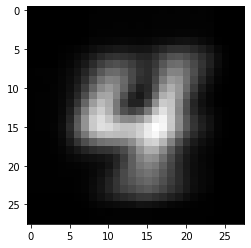

In [20]:
avr4 = four_stacked.mean(dim=0)
plt.imshow(avr4, cmap="gray");

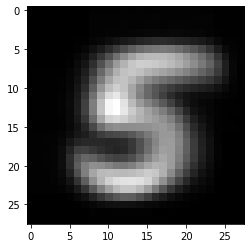

In [21]:
avr5= five_stacked.mean(dim=0)
plt.imshow(avr5, cmap="gray");

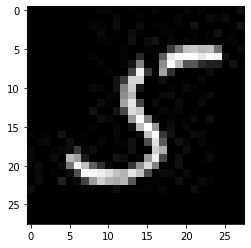

In [22]:
sampled_5 = five_stacked[80]
plt.imshow(sampled_5, cmap="gray");

In [23]:
dist_to_5 = ((sampled_5-avr5)**2).mean().sqrt()
dist_to_5.item()

0.20431473851203918

In [24]:
dist_to_4 = ((sampled_5-avr4)**2).mean().sqrt()
dist_to_4.item()

0.25160616636276245

In [25]:
def distance(x,y):
    return ((x-y)**2).mean((-1,-2)).sqrt()

In [26]:
distance(sampled_5, avr5)

tensor(0.2043)

In [27]:
x = distance(five_stacked, avr5)
x, x.shape

(tensor([0.2310, 0.2269, 0.2265,  ..., 0.2949, 0.2247, 0.2457]),
 torch.Size([2771]))

In [29]:
def is_five(x):
    return distance(x, avr5) < distance(x, avr4)

In [30]:
is_five(five_valid).float().mean()

tensor(0.9131)

In [31]:
accuracy_5 = is_five(five_valid).float().mean()
accuracy_5

tensor(0.9131)

In [34]:
accuracy_4 = 1-is_five(four_valid).float().mean()
accuracy_4

tensor(0.9844)

In [35]:
(accuracy_4 + accuracy_5)/2

tensor(0.9487)

In [36]:
x = torch.tensor(4.).requires_grad_()

In [37]:
def f(x):
    return x**3

In [38]:
grad = f(x)

In [39]:
grad.backward()

In [40]:
x.grad

tensor(48.)

In [41]:
train_x = torch.cat([five_stacked, four_stacked]).view(-1, 28*28)

In [42]:
train_y = torch.tensor([1] * len(five) + [0] * len(four))
train_y

tensor([1, 1, 1,  ..., 0, 0, 0])

In [43]:
train_x.shape, train_y.shape

(torch.Size([5755, 784]), torch.Size([5755]))

In [44]:
train_y.unsqueeze_(-1)

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [45]:
valid_x = torch.cat([five_valid, four_valid]).view(-1, 28*28)
valid_y = torch.tensor([1] * len(five_valid) + [0] * len(four_valid))

In [46]:
valid_y.unsqueeze_(1)

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [47]:
valid_y

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [48]:
train_y

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [49]:
ds_train = list(zip(train_x, train_y))

In [50]:
df_valid = list(zip(valid_x, valid_y))

In [51]:
ds_train[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0157, 0.0000, 0.0157, 0.0000, 0.0000, 0.0275, 0.0000, 0.0000, 0.0275,
         0.0000, 0.0039, 0.0000, 0.0000, 0.0157, 0.0000, 0.0314, 0.0000, 0.0471,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0039, 0.0000, 0.0039, 0.0078, 0.0118, 0.0314, 0.0157, 0.0078,
         0.0000, 0.0000, 0.0000, 0.0235, 0.0000, 0.0078, 0.0196, 0.0000, 0.0000,
         0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0118, 0.0039, 0.0039, 0.0000, 0.0039, 0.0039, 0.0000, 0.0196,
         0.0157, 0.0000, 0.0275, 0.0196, 0.0000, 0.0000, 0.0000, 0.0157, 0.0000,
         0.0902, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0157, 0.0000, 0.0078, 0.0000, 0.0118, 0.0078, 0.0000,
         0.0196, 0.0000, 0.0000, 0.0235, 0.0000, 0.0000, 0.0353, 0.0078, 0.0078,
         0.0000, 0.0235, 0.0

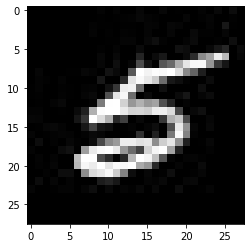

In [52]:
plt.imshow(ds_train[0][0].view(28,28), cmap="gray");

In [53]:
labels = {1:"Five", 0:"Four"}

In [54]:
labels[ds_train[0][1].item()]

'Five'

In [55]:
class Dataset():
    def __init__(self, x, y): 
        self.x,self.y = x,y
    def __len__(self): 
        return len(self.x)
    def __getitem__(self, i): 
        return self.x[i],self.y[i]

In [56]:
ds_train = Dataset(train_x, train_y)

In [57]:
ds_train[2]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0235,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0275, 0.0000, 0.0196, 0.0000,
         0.0000, 0.0235, 0.0000, 0.0353, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0196, 0.0353, 0.0275, 0.0196, 0.0000, 0.0000, 0.0000, 0.0471,
         0.0000, 0.0000, 0.0039, 0.0000, 0.0039, 0.0078, 0.0471, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0196, 0.0000, 0.0000, 0.0196, 0.0157, 0.0000, 0.0431,
         0.0000, 0.0039, 0.0314, 0.0118, 0.0000, 0.0000, 0.0235, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0275, 0.0196, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0118, 0.0039, 0.0000, 0.0000, 0.0000, 0.0588, 0.0039,
         0.0000, 0.0000, 0.0

In [58]:
def init(size):
    return torch.randn(size, dtype=torch.float32).requires_grad_()

In [59]:
w = init((28*28,1))
w.shape

torch.Size([784, 1])

In [60]:
b = init(1)
b.shape

torch.Size([1])

In [61]:
(train_x[0] * w.T).sum() + b

tensor([-7.1845], grad_fn=<AddBackward0>)

In [62]:
def linear_layer(xb):
    return xb @ w + b

In [63]:
preds = linear_layer(train_x)
preds.shape

torch.Size([5755, 1])

In [104]:
def sigmoid(x):
    return 1/(1+torch.pow(2,-x))

In [135]:
def loss_func(preds, targets):
    preds = preds.sigmoid()
    return torch.where(targets==1, torch.pow(2,1-preds), torch.pow(2,preds)).mean()

In [136]:
class DataLoader():
    def __init__(self, ds, bs): 
        self.ds, self.bs = ds, bs
    def __iter__(self):
        n = len(self.ds)
        l = torch.randperm(n)
        for i in range(0, n, self.bs): 
            idxs_l = l[i:i+self.bs]
            yield self.ds[idxs_l]

In [137]:
def accuracy(preds, actuals):
    preds = preds.sigmoid()
    correct = (preds > 0.5) == actuals
    return correct.float().mean()

In [138]:
ds_valid = Dataset(valid_x, valid_y)
valid_dl = DataLoader(ds_valid, bs = 512)

In [139]:
def validation_acc(model):
    return torch.stack([accuracy(model(xb), yb) for xb, yb in valid_dl]).mean().item()

In [140]:
train_dl = DataLoader(ds_train, bs = 512)


In [141]:
# params is list of variables that our model will update
def train(model, params, lr, epochs=5, valid_epoch=5):
    for epoch in range(epochs):
        for xb, yb in train_dl:
            preds = model(xb)
            loss = loss_func(preds, yb)
            loss.backward()
            for p in params:
                p.data = p.data - p.grad * lr
                p.grad.zero_()
        
        if epoch % valid_epoch == 0:
            print(validation_acc(model))
        

In [149]:
lr = 0.1
w = init((28*28,1))
b = init(1)
params = w, b
train(linear_layer, params, lr, epochs= 200, valid_epoch=10)

0.4722656309604645
0.756640613079071
0.84375
0.891406238079071
0.9125000238418579
0.9292968511581421
0.935546875
0.948437511920929
0.954296886920929
0.9585937261581421
0.9585937261581421
0.9437500238418579
0.9585937261581421
0.962109386920929
0.9632812738418579
0.9691406488418579
0.966796875
0.9644531011581421
0.967578113079071
0.970703125


In [143]:
model_1 = nn.Linear(28*28, 1)

In [77]:
w, b = model_1.parameters()

In [78]:
class Optimizer():
    def __init__(self, parameters,lr):
        self.params, self.lr = list(parameters), lr
    
    def step(self):
        for p in self.params:
            p.data = p.data - p.grad.data * self.lr
    
    def zero_grad(self):
        for p in self.params:
            p.grad = None

In [79]:
optim = Optimizer(model_1.parameters(), lr)

In [80]:
def train(model, epochs=5, valid_epoch=5):
    for epoch in range(epochs):
        for xb, yb in train_dl:
            preds = model(xb)
            loss = loss_func(preds, yb)
            loss.backward()
            optim.step()
            optim.zero_grad()
        
        if epoch % valid_epoch == 0:
            print(validation_acc(model))
        

In [81]:
train(model_1, 10)

0.926953136920929
0.971875011920929


In [134]:
import math

pow(2,0.7)

1.624504792712471

In [133]:
pow(2,0.3)

1.2311444133449163